# Poetry generation with RNNs(LSTMs)

>## Let's create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

## Import the required libraries and APIs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Step 1: Create a corpus from Shakespeare's sonnets


In [ ]:
# Load the text data
shakespeare_text = open('sonnets.txt').read()
print(f"Length of Shakespeare text: {len(shakespeare_text)}")

Length of Shakespeare text: 93578


In [ ]:
# Convert the text to lowercase and split by newlines to create a corpus of lines
corpus = shakespeare_text.lower().split("\n")
print(f"First 5 lines in corpus: {corpus[:5]}")

First 5 lines in corpus: ['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,', 'his tender heir might bear his memory:', 'but thou, contracted to thine own bright eyes,']


## Step 2: Set up the tokenizer

In [ ]:
# Initialize a Tokenizer to vectorize the corpus
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
# Fit the tokenizer on the corpus to create a word index
tokenizer.fit_on_texts(corpus)

In [ ]:
# Calculate the vocabulary size (including the OOV token)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for <OOV> token
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 3211


## Step 3: Create input sequences


In [ ]:
# Convert lines in corpus to sequences of word indices
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    # Create n-gram sequences for training
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)


## Step 4: Padding sequences to ensure consistent input shape


In [ ]:
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences,
                                                                          maxlen=max_seq_len,
                                                                          padding='pre'))


# Step 5: Creating features (X) and labels (y)


In [ ]:
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

In [ ]:
# One-hot encode the labels to convert them into a categorical format
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

# Step 6: Define the LSTM model

In [ ]:
# Build the model with an Embedding layer, a Bidirectional LSTM, and a Dense output layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),  
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),  
    tf.keras.layers.Dense(vocab_size, activation='softmax')  
])

## Step 7: Compile the model


In [ ]:
# Using Adam optimizer and categorical crossentropy as the loss function
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## Step 8: Train the model


In [ ]:
# Train for 20 epochs
epochs = 50
history = model.fit(X, y, epochs=epochs, verbose=1)

Epoch 1/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.0206 - loss: 7.0722
Epoch 2/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.0307 - loss: 6.3970
Epoch 3/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.0429 - loss: 6.1551
Epoch 4/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.0506 - loss: 5.9203
Epoch 5/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.0617 - loss: 5.6252
Epoch 6/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.0791 - loss: 5.2904
Epoch 7/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.0937 - loss: 4.9511
Epoch 8/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.1218 - loss: 4.6116
Epoch 9/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.1634 - loss: 4.2754
Epoch 10/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.2209 - loss: 3.9344
Epoch 11/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.2707 - loss: 3.6164
Epoch 12/20
484/484 ━━━━━━━━━━

## Step 9: Visualize accuracy and loss over epochs


In [ ]:
# Function to plot model metrics like accuracy or loss
def plot_metric(history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.title(f'{metric} over epochs')
    plt.show()

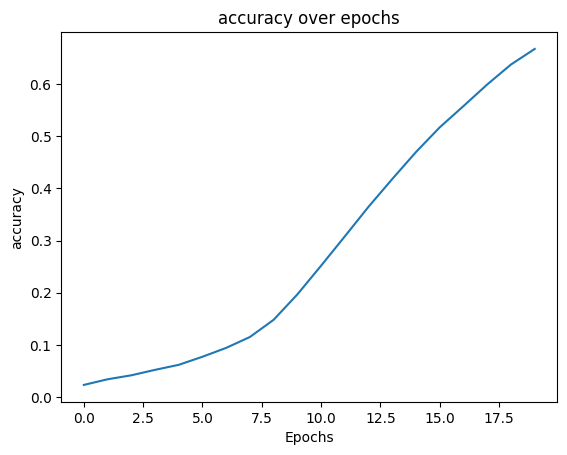

In [ ]:
# Plot accuracy and loss
plot_metric(history, 'accuracy')

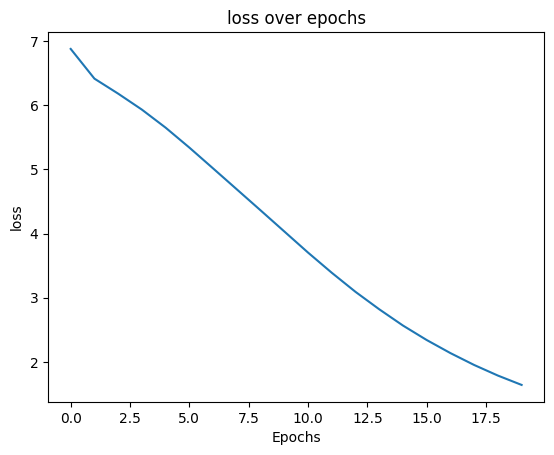

In [ ]:
plot_metric(history, 'loss')

## Step 10: Generate new text using the trained model


In [ ]:
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        # Append the predicted word to the seed text
        seed_text += " " + output_word
    return seed_text


In [ ]:
# Generate poetry starting with different seed texts
seed_text = "It was a cold night."
print(generate_text(seed_text, next_words=100))

seed_text = "Being your slave, what should I do but tend"
print(generate_text(seed_text, next_words=200))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

In [ ]:
seed_text = "It was a cold night."
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [ ]:
seed_text = "Being your slave, what should I do but tend"
next_words = 200

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━